In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

In [6]:
from imblearn.over_sampling import SMOTE

In [80]:
from itertools import cycle
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score

def predictor(train_x, train_y, clf):
    
    y_pred = clf.fit(train_x, train_y).predict_proba(test_x)
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(5):
        fpr[i], tpr[i], _ = roc_curve(test_y[:, i], y_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(test_y.ravel(), y_pred.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    
    print(f"f1 score:{f1_score(test_y.argmax(axis=1), y_pred.argmax(axis=1), average='micro')}\n")
    print(f"accuracy_score: {accuracy_score(test_y.argmax(axis=1), y_pred.argmax(axis=1))}\n")
    print(f"confusion_matrix:\n{confusion_matrix(test_y.argmax(axis=1), y_pred.argmax(axis=1))}\n")
    for i, area in enumerate(list(roc_auc.values())[0:-1]):
        print(f"auc class {i}: {area}\n")
    print(f"auc mirco: {roc_auc['micro']}\b")
    n_classes = 5
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    #Plot all ROC curves
    plt.figure(figsize=(7, 7))
    plt.plot(fpr["micro"], tpr["micro"],
             label='micro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["micro"]),
             color='deeppink', linestyle=':', linewidth=4)

    plt.plot(fpr["macro"], tpr["macro"],
             label='macro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["macro"]),
             color='navy', linestyle=':', linewidth=4)

    colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red', 'violet'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label='ROC curve of class {0} (area = {1:0.2f})'
                 ''.format(i, roc_auc[i]))
    
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Some extension of Receiver operating characteristic to multi-class')
    plt.legend(loc="lower right")
    plt.show()

## Read Data

In [7]:
train_df = pd.read_csv("./data/mitbih_train.csv", header=None)
test_df = pd.read_csv("./data/mitbih_test.csv", header=None)
train_df.rename(columns={187:'class'}, inplace=True)
test_df.rename(columns={187:'class'}, inplace=True)
train_df[['class']] = train_df[['class']].astype('int')
test_df[['class']] = test_df[['class']].astype('int')
train_df[['class']].value_counts()

In [ ]:
train_x = train_df.iloc[:, 0:187]
train_y = train_df.iloc[:, 187]
test_x = test_df.iloc[:, 0:187]
test_y = label_binarize(test_df.iloc[:, 187], classes=[0, 1, 2, 3, 4])

In [ ]:
over_y_train.values_coun

### oversampling

In [131]:
from sklearn.utils import resample
df0 = train_df[train_df['class'] == 0]
df1 = train_df[train_df['class'] == 1]
df2 = train_df[train_df['class'] == 2]
df3 = train_df[train_df['class'] == 3]
df4 = train_df[train_df['class'] == 4]
new_df0 = resample(df0, n_samples=70000)
new_df1 = resample(df1, n_samples = 70000)
new_df2 = resample(df2, n_samples = 70000)
new_df3 = resample(df3, n_samples = 70000)
new_df4 = resample(df4, n_samples = 70000)
new_train_df = pd.concat([new_df0, new_df1, new_df2, new_df3, new_df4])
over_x_train = new_train_df.iloc[:, 0:187]
over_y_train = new_train_df.iloc[:, 187]

### SMOTE sample

In [146]:
from imblearn.over_sampling import SMOTE
smo = SMOTE(random_state=20,sampling_strategy={3:70000, 1: 70000, 2:70000, 4:70000})
smote_x_train, smote_y_train = smo.fit_resample(train_x, train_y)

In [129]:
len(smote_y_train)

96690

## split x and y

## Different model try

### KNN

f1 score:0.9736433400328888

accuracy_score: 0.9736433400328888

confusion_matrix:
[[18021    38    45     9     5]
 [  186   357    13     0     0]
 [  113     3  1305    23     4]
 [   43     0    16   103     0]
 [   69     0    10     0  1529]]

auc class 0: 0.9776954810111632

auc class 1: 0.9062521495739291

auc class 2: 0.983786392365724

auc class 3: 0.9247089703601439

auc class 4: 0.9901960414600239

auc mirco: 0.993658345405842


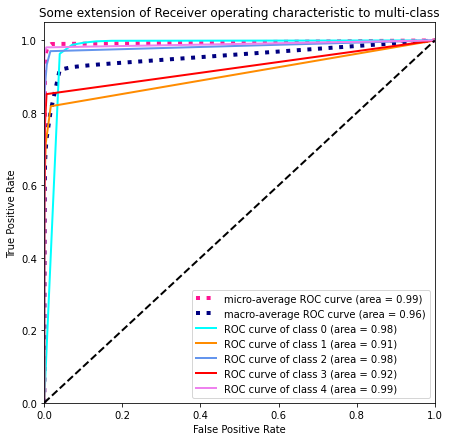

In [145]:
from sklearn.neighbors import KNeighborsClassifier
predictor(train_x, train_y, KNeighborsClassifier(algorithm="kd_tree"))

### KNN with undersampling

f1 score:0.9709939704001461

accuracy_score: 0.9709939704001461

confusion_matrix:
[[17906   128    46    33     5]
 [  138   402    11     5     0]
 [  105    10  1289    40     4]
 [   21     0    10   131     0]
 [   67     2     9     1  1529]]

auc class 0: 0.9760234210366674

auc class 1: 0.8988534425552922

auc class 2: 0.9786216808670716

auc class 3: 0.9244858334327578

auc class 4: 0.9898873802943476

auc mirco: 0.992081845635980


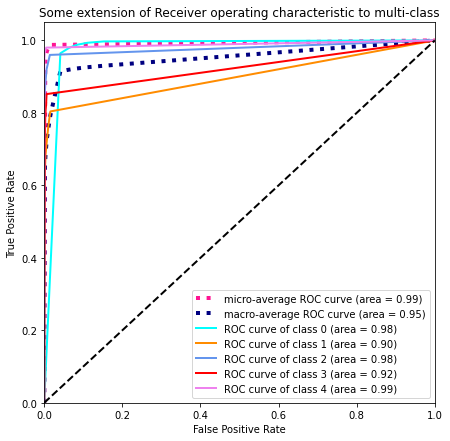

In [95]:
from sklearn.neighbors import KNeighborsClassifier
predictor(over_x_train, over_y_train, KNeighborsClassifier())

### KNN with smote sampling

f1 score:0.9555088616846337

accuracy_score: 0.9555088616846337

confusion_matrix:
[[17393   411   158   105    51]
 [   76   455    18     5     2]
 [   25    18  1366    31     8]
 [   12     1    14   135     0]
 [   19     5    10     5  1569]]

auc class 0: 0.9790403784692857

auc class 1: 0.9152032704545026

auc class 2: 0.9760692630508783

auc class 3: 0.9204611307119361

auc class 4: 0.989667661372687

auc mirco: 0.986450889543251


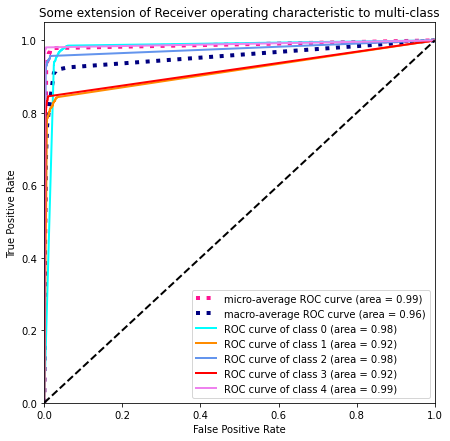

In [152]:
from sklearn.neighbors import KNeighborsClassifier
predictor(smote_x_train, smote_y_train, KNeighborsClassifier(n_neighbors=5, weights="distance"))

## Naive Bayes

f1 score:0.19148547414580672

accuracy_score: 0.1914854741458067

confusion_matrix:
[[ 2106    58  1151  2168 12635]
 [   44    78    32    51   351]
 [  127     9   281    80   951]
 [    0     0     1   134    27]
 [    1     0     5     9  1593]]

auc class 0: 0.7655719149732254

auc class 1: 0.6194487464022033

auc class 2: 0.6315404207532016

auc class 3: 0.9248145023378955

auc class 4: 0.6889834131452774

auc mirco: 0.615963937036019


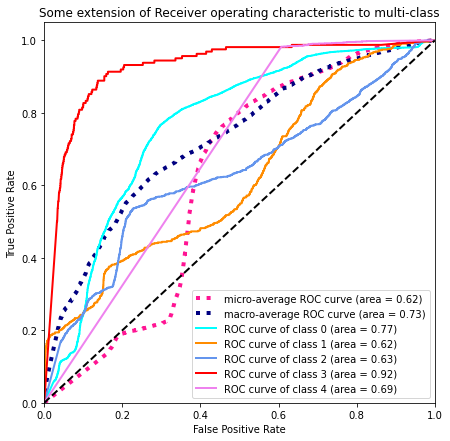

In [83]:
predictor(train_x, train_y, GaussianNB())

### LDA

f1 score:0.8922894207929838

accuracy_score: 0.8922894207929838

confusion_matrix:
[[17069   176   519   341    13]
 [  227   290    32     7     0]
 [  570    57   734    67    20]
 [   77     0     6    79     0]
 [  210     3    31     2  1362]]

auc class 0: 0.9035865131444438

auc class 1: 0.7803513095035782

auc class 2: 0.8517852905822237

auc class 3: 0.9466999596620705

auc class 4: 0.9655450746170547

auc mirco: 0.973659635478941


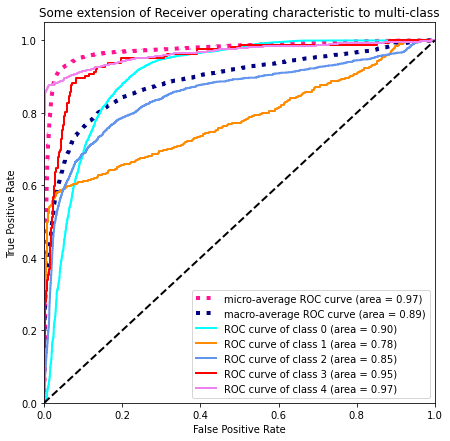

In [81]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
predictor(train_x, train_y, LinearDiscriminantAnalysis())

### LDA with oversampling

f1 score:0.8749314818198428

accuracy_score: 0.8749314818198428

confusion_matrix:
[[16671   195   546   690    16]
 [  218   299    27    12     0]
 [  546    64   708   108    22]
 [   41     0     6   115     0]
 [  210     3    28     6  1361]]

auc class 0: 0.8995467386764959

auc class 1: 0.7884597552554133

auc class 2: 0.8428707621736672

auc class 3: 0.9527608756171418

auc class 4: 0.9654404348794384

auc mirco: 0.969762817344044


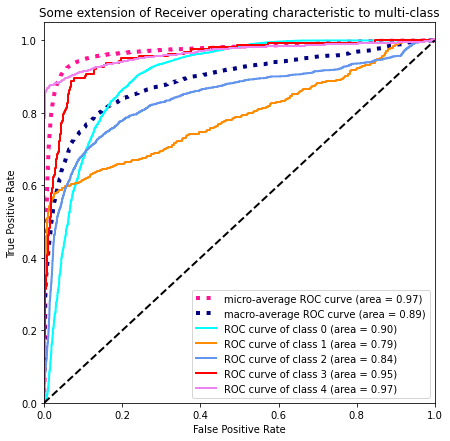

In [109]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
predictor(over_x_train, over_y_train, LinearDiscriminantAnalysis())

### LDA with smote sampling

f1 score:0.872464827334186

accuracy_score: 0.872464827334186

confusion_matrix:
[[16599   204   582   717    16]
 [  215   301    28    12     0]
 [  539    62   722   103    22]
 [   39     0     6   117     0]
 [  207     3    31     6  1361]]

auc class 0: 0.8988867977475342

auc class 1: 0.7910800437265486

auc class 2: 0.8463285976730939

auc class 3: 0.9537261452279092

auc class 4: 0.9651636745772224

auc mirco: 0.969475330705068


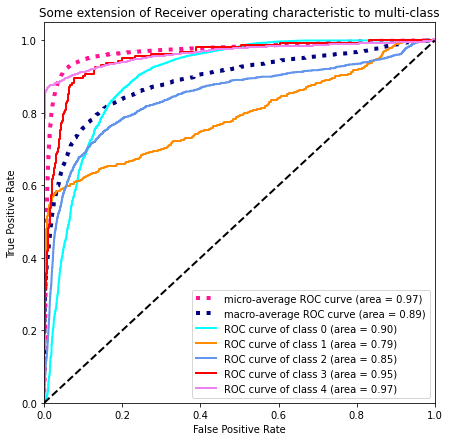

In [110]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
predictor(smote_x_train, smote_y_train, LinearDiscriminantAnalysis())

## Logitic Regression

E:\DepEnvs\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
E:\DepEnvs\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
E:\DepEnvs\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
E:\DepEnvs\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
E:\DepEnvs\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not conve

f1 score:0.9057646628905536

accuracy_score: 0.9057646628905536

confusion_matrix:
[[17890    15   195     0    18]
 [  451    76    29     0     0]
 [  956    12   452     1    27]
 [  132     0    12    18     0]
 [  202     1    12     0  1393]]

auc class 0: 0.9144409436741405

auc class 1: 0.8154171825644095

auc class 2: 0.8968313995596109

auc class 3: 0.9637211455972001

auc class 4: 0.9827792363365582

auc mirco: 0.98417769777095


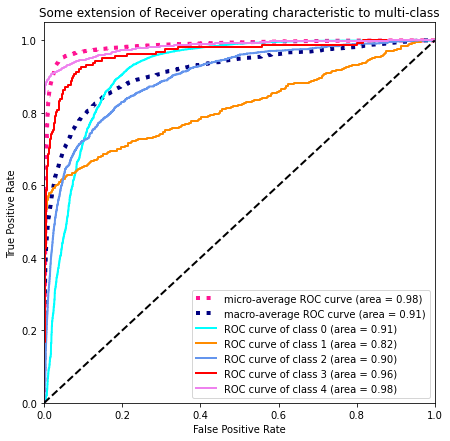

In [84]:
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
predictor(train_x, train_y, LogisticRegression(solver="saga", multi_class="ovr"))

### LogisticRegression with oversampling

E:\DepEnvs\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
E:\DepEnvs\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
E:\DepEnvs\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
E:\DepEnvs\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
E:\DepEnvs\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not conve

f1 score:0.9047140507948109

accuracy_score: 0.9047140507948109

confusion_matrix:
[[17710    61   186   135    26]
 [  303   227    22     4     0]
 [  905    49   384    84    26]
 [   62     0     3    97     0]
 [  207     2    10     1  1388]]

auc class 0: 0.9070087291501809

auc class 1: 0.8225127996590353

auc class 2: 0.8823580261293212

auc class 3: 0.9689676330725572

auc class 4: 0.9828486793502414

auc mirco: 0.981649133735569


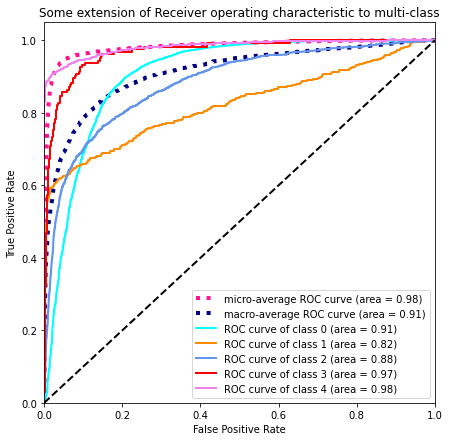

In [96]:
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
predictor(over_x_train, over_y_train, LogisticRegression(solver="saga", multi_class="ovr"))

### LogisticRegression with smote sample

E:\DepEnvs\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
E:\DepEnvs\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
E:\DepEnvs\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
E:\DepEnvs\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
E:\DepEnvs\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not conve

f1 score:0.7266443396479515

auc: 0.9028642487634845

accuracy_score: 0.6612917960898959

confusion_matrix:
[[11460  2220  2285  1535   618]
 [  133   368    31    15     9]
 [  148    53  1028   162    57]
 [   13     0    10   139     0]
 [   40    12    61    13  1482]]



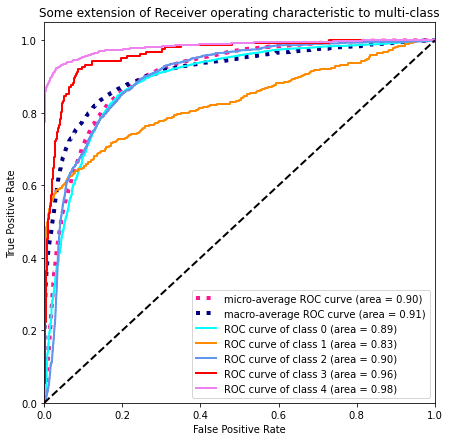

In [66]:
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
predictor(smote_x_train, smote_y_train, LogisticRegression(solver="saga", multi_class="ovr"))

### Desicion tree

f1 score:0.955874291978805

accuracy_score: 0.955874291978805

confusion_matrix:
[[17744   148   129    37    60]
 [  198   345    10     1     2]
 [  158    14  1242    17    17]
 [   46     0    23    92     1]
 [   77     4    24     0  1503]]

auc class 0: 0.9386862374214893

auc class 1: 0.8311990171642215

auc class 2: 0.938825714172984

auc class 3: 0.8159402998642147

auc class 4: 0.9732144193006571

auc mirco: 0.978133955792282


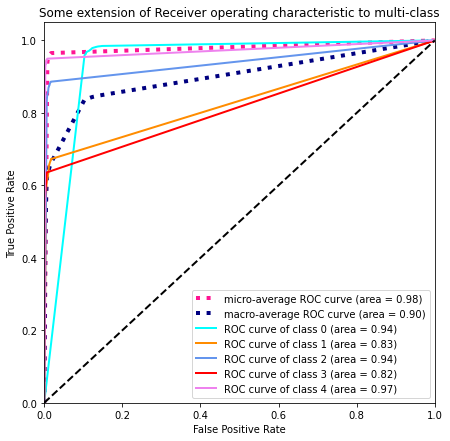

In [85]:
from sklearn import tree
predictor(train_x, train_y, tree.DecisionTreeClassifier(random_state=20,min_samples_split=10))

### desicion tree with oversampling

f1 score:0.9537730677873195

accuracy_score: 0.9537730677873195

confusion_matrix:
[[17697   177   130    51    63]
 [  194   340    16     2     4]
 [  147    22  1237    25    17]
 [   37     0    17   108     0]
 [   83     6    19     2  1498]]

auc class 0: 0.9358510141928322

auc class 1: 0.8085361013776157

auc class 2: 0.9321569614502789

auc class 3: 0.8316459579690135

auc class 4: 0.9696424883568746

auc mirco: 0.975442775317724


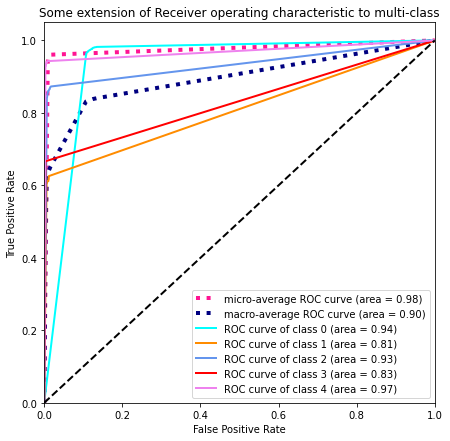

In [97]:
from sklearn import tree
predictor(over_x_train, over_y_train, tree.DecisionTreeClassifier(random_state=20,min_samples_split=10))

### decision tree with smote sampling 

f1 score:0.9511693769413484

accuracy_score: 0.9511693769413484

confusion_matrix:
[[17586   269   120    92    51]
 [  157   384     8     4     3]
 [  137    15  1248    35    13]
 [   37     1    11   113     0]
 [   80    11    20     5  1492]]

auc class 0: 0.9412986236432859

auc class 1: 0.8524057862821104

auc class 2: 0.9381716062257659

auc class 3: 0.8578809519751383

auc class 4: 0.9688172662128128

auc mirco: 0.975060773109418


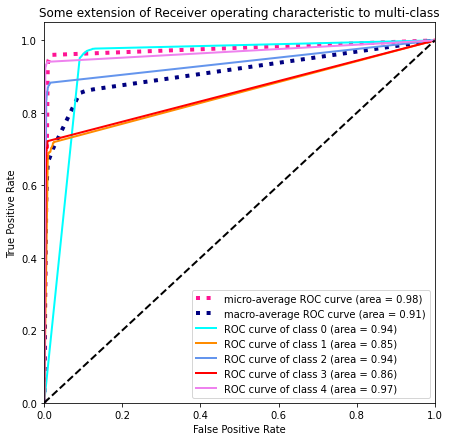

In [118]:
from sklearn import tree
predictor(smote_x_train, smote_y_train, tree.DecisionTreeClassifier(random_state=20,min_samples_split=10))

## Random Forest

f1 score:0.972912479444546

accuracy_score: 0.972912479444546

confusion_matrix:
[[18101     4    11     0     2]
 [  230   323     2     0     1]
 [  160     0  1270    14     4]
 [   51     0    13    98     0]
 [   97     0     4     0  1507]]

auc class 0: 0.9937775138696551

auc class 1: 0.9781730998778031

auc class 2: 0.9979319770973882

auc class 3: 0.9828458693391965

auc class 4: 0.9993201329675817

auc mirco: 0.99862513361858


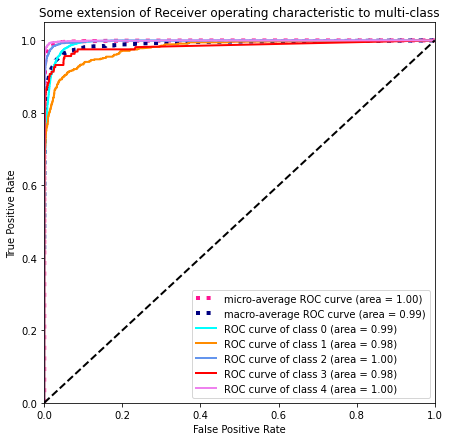

In [86]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
predictor(train_x, train_y, RandomForestClassifier(min_samples_split=10))

### random forest with undersampling

f1 score:0.973780376393203

accuracy_score: 0.973780376393203

confusion_matrix:
[[18098    10     6     3     1]
 [  206   349     0     0     1]
 [  175     2  1250    17     4]
 [   42     0     8   112     0]
 [   94     0     5     0  1509]]

auc class 0: 0.9941438779740631

auc class 1: 0.9811556969272726

auc class 2: 0.9974689821055441

auc class 3: 0.9809933073125279

auc class 4: 0.9989147267998404

auc mirco: 0.998666037332113


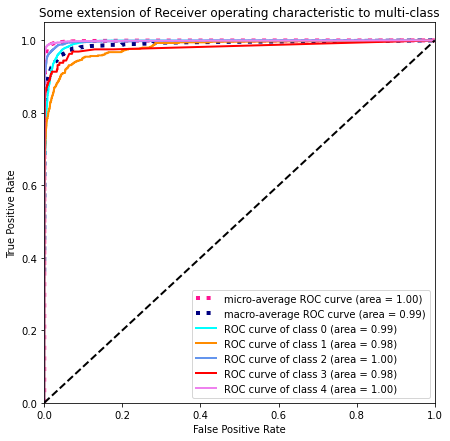

In [119]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
predictor(over_x_train, over_y_train, RandomForestClassifier(min_samples_split=10))

### random forest with smote sampling

f1 score:0.9799926913941166

accuracy_score: 0.9799926913941166

confusion_matrix:
[[17997    68    32    13     8]
 [  127   424     2     2     1]
 [   71     3  1352    16     6]
 [   29     0    12   121     0]
 [   43     0     5     0  1560]]

auc class 0: 0.9954635477734052

auc class 1: 0.9826099469131107

auc class 2: 0.9967067935749024

auc class 3: 0.9895939504468421

auc class 4: 0.9993447062900838

auc mirco: 0.998903007775342


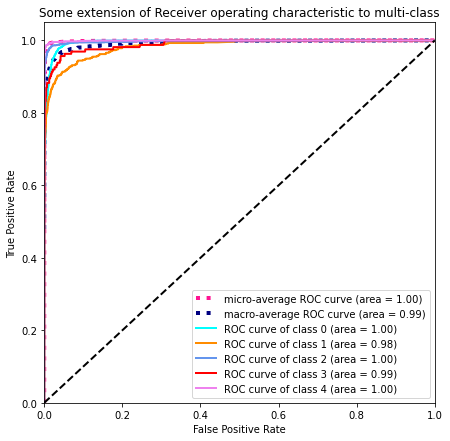

In [148]:
from sklearn.ensemble import RandomForestClassifier
predictor(smote_x_train, smote_y_train, RandomForestClassifier(min_samples_split=10))

## Neural Network

E:\DepEnvs\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


f1 score:0.9738260551799744

accuracy_score: 0.9738260551799744

confusion_matrix:
[[17944   111    21    11    31]
 [  147   394     9     3     3]
 [  107    11  1292    27    11]
 [   34     0     9   119     0]
 [   29     0     8     1  1570]]

auc class 0: 0.9864468388441948

auc class 1: 0.9471284895593088

auc class 2: 0.9944827049447029

auc class 3: 0.975761165368467

auc class 4: 0.9988114667247473

auc mirco: 0.997262235175293


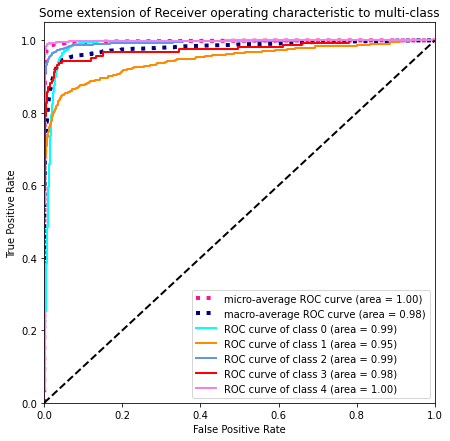

In [87]:
from sklearn.neural_network import MLPClassifier
predictor(train_x, train_y, MLPClassifier(hidden_layer_sizes=(20, 20, 30, 30, 20, 10), learning_rate="adaptive"))

### neural network with undersampling

f1 score:0.952311346610634

accuracy_score: 0.952311346610634

confusion_matrix:
[[17399   342   269    38    70]
 [  124   413    14     1     4]
 [   62     6  1358    17     5]
 [   22     1    14   125     0]
 [   31     6    16     2  1553]]

auc class 0: 0.9821829038313458

auc class 1: 0.9294122070172883

auc class 2: 0.9919126875085802

auc class 3: 0.9750847948731061

auc class 4: 0.9970234854126135

auc mirco: 0.994999514762001


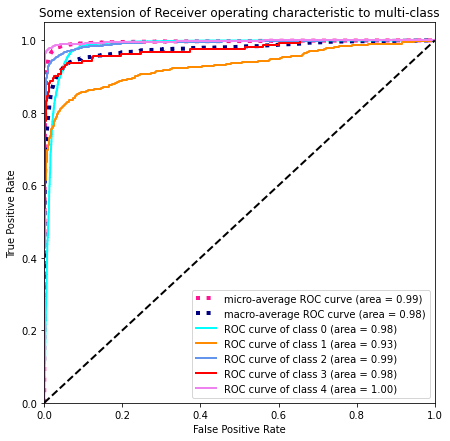

In [132]:
from sklearn.neural_network import MLPClassifier
predictor(over_x_train, over_y_train, MLPClassifier(hidden_layer_sizes=(20, 20, 30, 30, 20, 10), learning_rate="adaptive"))

### neural network with smote sample

E:\DepEnvs\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


f1 score:0.9234423533710945

accuracy_score: 0.9234423533710945

confusion_matrix:
[[16769   826   248   131   144]
 [  106   431    11     5     3]
 [   85    10  1315    28    10]
 [   14     3    10   135     0]
 [   25     6    10     1  1566]]

auc class 0: 0.9795322081300278

auc class 1: 0.9358427206491274

auc class 2: 0.9880831656020868

auc class 3: 0.9702831609028878

auc class 4: 0.9964996735411878

auc mirco: 0.992690233472266


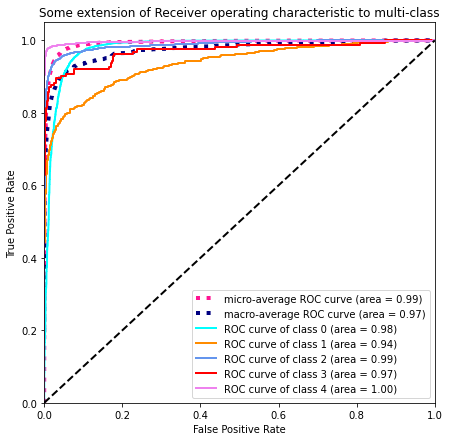

In [153]:
from sklearn.neural_network import MLPClassifier
predictor(smote_x_train, smote_y_train, MLPClassifier(hidden_layer_sizes=(10, 20, 30, 30, 10, 10), learning_rate="adaptive"))